In [ ]:
import numpy as np
import pandas as pd
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('Born.csv')


In [ ]:
def Min_Max_normalization(name):
    #調整維度成[[資料1],[資料2]]
    name = name.reshape(-1, 1)
    #正規化數值
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(name)
    sc = scaler.transform(name)

    #[維度還原]
    return sc.reshape(-1)

#df[row]:可以直接取一整排的數值回傳的type是dataframe
#values:轉成dataframe轉成array
open_p  = Min_Max_normalization(df['Open'].values)
max_p = Min_Max_normalization(df['High'].values)
min_p = Min_Max_normalization(df['Low'].values)
fin_p = Min_Max_normalization(df['Close'].values)

#replace(old,new)這裡是將文字中的,去除掉
#len_p = np.array([int(i.replace(',','')) for i in df['Volume'].values])
len_p = Min_Max_normalization(df['Volume'].values)

In [ ]:
data = []
tmp = []
label = []
#最後一筆label的範圍是最大數量-11天
for cnt in range(len(open_p)-11):
    #獲取10天的資料
    open_10 = open_p[cnt:cnt+10]
    max_10 = max_p[cnt:cnt+10]
    min_10 = min_p[cnt:cnt+10]
    fin_10 = fin_p[cnt:cnt+10]
    len_10 = len_p[cnt:cnt+10]

    #zip可以將每筆資料都同時丟進for迴圈中
    for i,j,k,m,n in zip(open_10,max_10,min_10,fin_10,len_10):
        tmp.append([i, j, k, m, n])
    data.append(tmp)
    tmp = []
    #取得收盤價
    label.append(fin_p[cnt+11:cnt+12][0])

In [ ]:
split_cnt = int(len(data)*0.8)
x_train,y_train = np.array(data[0:split_cnt]),np.array(label[0:split_cnt])
x_test,y_test = np.array(data[0:len(data)-split_cnt]),np.array(label[0:len(data)-split_cnt])

In [ ]:
model= Sequential()
model.add(LSTM(128,input_shape=(10, 5),return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(1))
#mse為跑回歸任務的其中一個loss function
#回歸任務沒有acc只有loss
model.compile(loss='mean_squared_error',optimizer='adam')
# 開始訓練model batch_size一次丟多少資料進去訓練 epochs總共要訓練幾次
history = model.fit(x_train, y_train,
                    batch_size=300,
                    epochs=1000,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2483 - val_loss: 0.3420
Epoch 2/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.2147 - val_loss: 0.2944
Epoch 3/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.1855 - val_loss: 0.2535
Epoch 4/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.1607 - val_loss: 0.2184
Epoch 5/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.1392 - val_loss: 0.1855
Epoch 6/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.1192 - val_loss: 0.1538
Epoch 7/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.1000 - val_loss: 0.1224
Epoch 8/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.0811 - val_loss: 0.0905
Epoch 9/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.0618 - val_loss: 0.0605
Epoch 10/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.0437 - val_loss: 0.0348
Epoch 11/10

In [ ]:
import matplotlib.pyplot as plt

2/2 [==============================] - 0s 6ms/step
[[0.8998299 ]
 [0.661919  ]
 [0.62937075]
 [0.6554662 ]
 [0.62388   ]
 [0.6231539 ]
 [0.55849224]
 [0.58801985]
 [0.64480627]
 [0.50894123]
 [0.7777507 ]
 [0.654736  ]
 [0.6602973 ]
 [0.61272097]
 [0.59087765]
 [0.58268976]
 [0.5367858 ]
 [0.5069942 ]
 [0.527433  ]
 [0.5953131 ]
 [0.5922192 ]
 [0.6415826 ]
 [0.6306095 ]
 [0.5927506 ]
 [0.6710095 ]
 [0.5952021 ]
 [0.5333211 ]
 [0.51152575]
 [0.4467657 ]
 [0.42948958]
 [0.4507315 ]
 [0.42967978]
 [0.4251474 ]
 [0.51109123]
 [0.6026896 ]
 [0.4673935 ]
 [0.54441345]
 [0.44829884]
 [0.44904214]
 [0.42526668]
 [0.37178737]
 [0.37011734]
 [0.4090147 ]
 [0.3872563 ]
 [0.4269462 ]
 [0.44062907]
 [0.47676036]
 [0.49350658]
 [0.55924845]
 [0.3583455 ]
 [0.31532148]
 [0.39127737]
 [0.32451582]
 [0.30183592]]


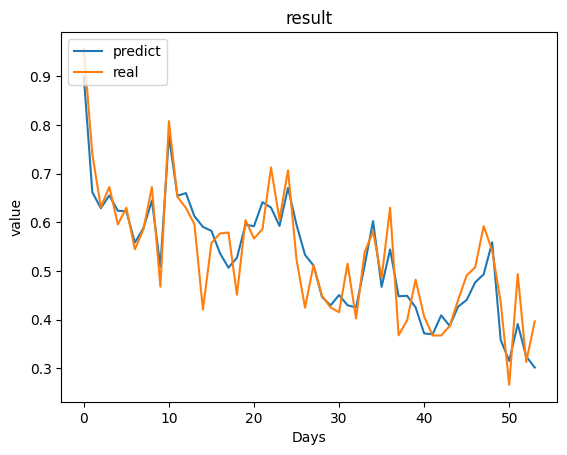

In [ ]:
y_predicted = model.predict(x_test)
print(y_predicted)
#預測
plt.plot(y_predicted)
#實際值
plt.plot(y_test)
#標題
plt.title('result')
#y軸標籤
plt.ylabel('value')
#x軸標籤
plt.xlabel('Days')
#顯示折線的名稱
plt.legend(['predict', 'real'], loc='upper left')
#顯示折線圖
plt.show()
